# Pro Kabaddi League 2019 Dataset EDA.

### Questions

In [1]:
#Task 1: Predict the winner of the tournament
#Task 2: Predict the top team in the points table after the completion of league matches
#Task 3: Predict the team with the highest points for successful raids
#Task 4: Predict the team with the highest points for successful tackles
#Task 5: Predict the team with the highest super-performance total
#Task 6: Predict the player with the highest SUCCESSFUL RAID percentage
#Task 7: Predict the player with the highest SUCCESSFUL TACKLE percentage

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
plt.style.use('fivethirtyeight')

In [3]:
players_data = pd.read_csv("PlayerData.csv")

In [4]:
points_table = pd.read_csv("PointsTable.csv")

In [5]:
teamdata = pd.read_csv("TeamData.csv")

In [6]:
leaguetable = pd.read_csv("Leaguetable.csv")

In [7]:
players_data.head()

,Unnamed: 0,Name,Position,Born,Team,Height,Nationality,Weight,Match Played,Points,...,Super Raids,Super 10s,Tackles,Successful Tackles,Unsuccessful Tackles,Successful Tackles Per Match,Tackle Bonus Points,Tackle Success Rate,Super Tackles,High 5s
0,0,Maninder Singh,Raider,"Jan 1, 1990",Bengal Warriors,6 ft,India,76 kg,20.0,205.0,...,6.0,10.0,7.0,0.0,7.0,0.00,0.0,0.00,0.0,0.0
1,1,K. Prapanjan,Raider,"May 29, 1993",Bengal Warriors,6 ft 1 in,India,83.6 kg,18.0,101.0,...,4.0,3.0,14.0,2.0,12.0,0.11,0.0,14.28,0.0,0.0
2,2,Mohammad Taghi,Raider,"Oct 21, 1991",Bengal Warriors,-,Iran,-,3.0,1.0,...,0.0,0.0,4.0,1.0,3.0,0.33,0.0,25.00,0.0,0.0
3,3,Rakesh Narwal,Raider,"May 6, 1995",Bengal Warriors,6 ft 1 in,India,82 kg,2.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0
4,4,Ravindra Ramesh,Raider,"Apr 16, 1996",Bengal Warriors,-,India,-,3.0,2.0,...,0.0,0.0,2.0,1.0,1.0,0.33,0.0,50.00,0.0,0.0


In [8]:
players_data.columns

Index(['Unnamed: 0', 'Name', 'Position', 'Born', 'Team', 'Height',
       'Nationality', 'Weight', 'Match Played', 'Points', 'Career Best Points',
       'Not Out Percentage', 'Raids', 'Successful Raids', 'Unsuccessful Raids',
       'Empty Raid', 'Successful Raid Percentage', 'Raid Touch Points',
       'Raid Bonus Points', 'Total Raid Points', 'Super Raids', 'Super 10s',
       'Tackles', 'Successful Tackles', 'Unsuccessful Tackles',
       'Successful Tackles Per Match', 'Tackle Bonus Points',
       'Tackle Success Rate', 'Super Tackles', 'High 5s'],
      dtype='object')

In [9]:
teamdata

,Unnamed: 0,Team,Games,TOTAL POINTS SCORED,TOTAL POINTS CONCEDED,AVG POINTS SCORED,SUCCESSFUL RAIDS,RAID POINTS,AVG RAID POINTS,SUCCESSFUL TACKLES,TACKLE POINTS,AVG TACKLE POINTS,SUPER RAID,SUPER TACKLES,DO-OR-DIE RAID POINTS,ALL-OUTS INFLICTED,ALL-OUTS CONCEDED
0,0,Dabang Delhi K.C.,20,742,659,31.20,361,437,21.85,181,187,9.35,8,8,50,34,18
1,1,Bengal Warriors,20,718,623,30.90,340,426,21.30,182,192,9.60,15,12,53,34,17
2,2,Bengaluru Bulls,19,656,644,30.73,309,393,20.68,168,191,10.05,8,25,42,21,24
3,3,Puneri Paltan,20,652,723,29.50,290,358,17.90,207,232,11.60,6,25,60,18,33
4,4,Haryana Steelers,19,650,626,30.10,290,377,19.84,181,195,10.26,14,14,71,27,21
5,5,Patna Pirates,19,640,641,29.42,291,368,19.37,168,191,10.05,13,23,69,28,23
6,6,Jaipur Pink Panthers,20,626,644,27.80,261,337,16.85,189,219,10.95,7,32,73,19,23
7,7,Gujarat Fortunegiants,20,605,591,26.15,265,320,16.00,187,203,10.15,5,17,59,21,22
8,8,U Mumba,19,598,561,26.73,258,325,17.11,168,183,9.63,7,18,66,26,21
9,9,Tamil Thalaivas,20,578,695,25.75,275,344,17.20,160,171,8.55,4,13,55,14,30


In [10]:
leaguetable

,Unnamed: 0,Rank,Team,P,W,L,T,Score Diff.,Pts
0,0,1,Dabang Delhi K.C.,20,15,3,2,83,82
1,1,2,Bengal Warriors,20,13,4,3,95,78
2,2,3,Haryana Steelers,19,12,6,1,24,65
3,3,4,U Mumba,19,10,8,1,37,59
4,4,5,Bengaluru Bulls,19,10,8,1,12,58
5,5,6,U.P. Yoddha,18,10,6,2,-19,58
6,6,7,Jaipur Pink Panthers,20,8,10,2,-18,52
7,7,8,Gujarat Fortunegiants,20,6,12,2,14,45
8,8,9,Puneri Paltan,20,6,11,3,-71,42
9,9,10,Patna Pirates,19,6,12,1,-1,40


In [11]:
players_data.columns

Index(['Unnamed: 0', 'Name', 'Position', 'Born', 'Team', 'Height',
       'Nationality', 'Weight', 'Match Played', 'Points', 'Career Best Points',
       'Not Out Percentage', 'Raids', 'Successful Raids', 'Unsuccessful Raids',
       'Empty Raid', 'Successful Raid Percentage', 'Raid Touch Points',
       'Raid Bonus Points', 'Total Raid Points', 'Super Raids', 'Super 10s',
       'Tackles', 'Successful Tackles', 'Unsuccessful Tackles',
       'Successful Tackles Per Match', 'Tackle Bonus Points',
       'Tackle Success Rate', 'Super Tackles', 'High 5s'],
      dtype='object')

### Droping unnecessary columns

In [12]:
players_data.drop(columns=['Unnamed: 0','Born','Height','Nationality','Weight','Successful Raids', 'Unsuccessful Raids','Empty Raid','Successful Tackles', 'Unsuccessful Tackles','Tackle Bonus Points'],inplace=True)

In [13]:
players_data.columns

Index(['Name', 'Position', 'Team', 'Match Played', 'Points',
       'Career Best Points', 'Not Out Percentage', 'Raids',
       'Successful Raid Percentage', 'Raid Touch Points', 'Raid Bonus Points',
       'Total Raid Points', 'Super Raids', 'Super 10s', 'Tackles',
       'Successful Tackles Per Match', 'Tackle Success Rate', 'Super Tackles',
       'High 5s'],
      dtype='object')

In [14]:
leaguetable = leaguetable.drop(columns = ["Unnamed: 0"])

In [15]:
leaguetable.columns

Index(['Rank', 'Team', 'P', 'W', 'L', 'T', 'Score Diff.', 'Pts'], dtype='object')

In [16]:
leaguetable

,Rank,Team,P,W,L,T,Score Diff.,Pts
0,1,Dabang Delhi K.C.,20,15,3,2,83,82
1,2,Bengal Warriors,20,13,4,3,95,78
2,3,Haryana Steelers,19,12,6,1,24,65
3,4,U Mumba,19,10,8,1,37,59
4,5,Bengaluru Bulls,19,10,8,1,12,58
5,6,U.P. Yoddha,18,10,6,2,-19,58
6,7,Jaipur Pink Panthers,20,8,10,2,-18,52
7,8,Gujarat Fortunegiants,20,6,12,2,14,45
8,9,Puneri Paltan,20,6,11,3,-71,42
9,10,Patna Pirates,19,6,12,1,-1,40


In [17]:
teamdata = teamdata.drop(columns = ["Unnamed: 0"])

In [18]:
teamdata

,Team,Games,TOTAL POINTS SCORED,TOTAL POINTS CONCEDED,AVG POINTS SCORED,SUCCESSFUL RAIDS,RAID POINTS,AVG RAID POINTS,SUCCESSFUL TACKLES,TACKLE POINTS,AVG TACKLE POINTS,SUPER RAID,SUPER TACKLES,DO-OR-DIE RAID POINTS,ALL-OUTS INFLICTED,ALL-OUTS CONCEDED
0,Dabang Delhi K.C.,20,742,659,31.20,361,437,21.85,181,187,9.35,8,8,50,34,18
1,Bengal Warriors,20,718,623,30.90,340,426,21.30,182,192,9.60,15,12,53,34,17
2,Bengaluru Bulls,19,656,644,30.73,309,393,20.68,168,191,10.05,8,25,42,21,24
3,Puneri Paltan,20,652,723,29.50,290,358,17.90,207,232,11.60,6,25,60,18,33
4,Haryana Steelers,19,650,626,30.10,290,377,19.84,181,195,10.26,14,14,71,27,21
5,Patna Pirates,19,640,641,29.42,291,368,19.37,168,191,10.05,13,23,69,28,23
6,Jaipur Pink Panthers,20,626,644,27.80,261,337,16.85,189,219,10.95,7,32,73,19,23
7,Gujarat Fortunegiants,20,605,591,26.15,265,320,16.00,187,203,10.15,5,17,59,21,22
8,U Mumba,19,598,561,26.73,258,325,17.11,168,183,9.63,7,18,66,26,21
9,Tamil Thalaivas,20,578,695,25.75,275,344,17.20,160,171,8.55,4,13,55,14,30


In [19]:
points_table = points_table.drop(columns = ["Unnamed: 0"])

In [20]:
points_table

,Date,HomeTeam,AwayTeam,Total_Points_HomeTeam,Total_Points_AwayTeam,FirstHalf_Points_HomeTeam,FirstHalf_Points_AwayTeam,SecondHalf_Points_HomeTeam,SecondHalf_Points_AwayTeam
0,01.10. 01:00,Tamil Thalaivas,U Mumba,32,36,11,15,21,21
1,01.10. 00:00,Bengal Warriors,Dabang Delhi,42,33,25,14,17,19
2,30.09. 01:00,Haryana Steelers,Gujarat FortuneGiants,38,37,14,19,24,18
3,30.09. 00:00,Puneri Paltan,Dabang Delhi,40,60,16,30,24,30
4,29.09. 01:00,Gujarat FortuneGiants,Tamil Thalaivas,50,21,20,9,30,12
...,...,...,...,...,...,...,...,...,...
98,01.08. 00:00,Haryana Steelers,Jaipur Pink Panthers,21,37,8,13,13,24
99,30.07. 01:00,Bengal Warriors,Puneri Paltan,43,23,18,9,25,14
100,30.07. 00:00,Tamil Thalaivas,Patna Pirates,23,24,11,11,12,13
101,29.07. 01:00,U Mumba,Bengaluru Bulls,26,30,11,13,15,17


## Statistical and descriptive  Analysis of data

In [21]:
players_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220 entries, 0 to 219
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Name                          220 non-null    object 
 1   Position                      220 non-null    object 
 2   Team                          220 non-null    object 
 3   Match Played                  220 non-null    float64
 4   Points                        220 non-null    float64
 5   Career Best Points            220 non-null    float64
 6   Not Out Percentage            220 non-null    float64
 7   Raids                         220 non-null    float64
 8   Successful Raid Percentage    220 non-null    float64
 9   Raid Touch Points             220 non-null    float64
 10  Raid Bonus Points             220 non-null    float64
 11  Total Raid Points             220 non-null    float64
 12  Super Raids                   220 non-null    float64
 13  Super

In [22]:
players_data.describe()

,Match Played,Points,Career Best Points,Not Out Percentage,Raids,Successful Raid Percentage,Raid Touch Points,Raid Bonus Points,Total Raid Points,Super Raids,Super 10s,Tackles,Successful Tackles Per Match,Tackle Success Rate,Super Tackles,High 5s
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,9.563636,30.195455,5.077273,48.598273,43.740909,21.215773,15.072727,4.500000,19.572727,0.459091,0.609091,24.736364,0.648500,27.114955,0.945455,0.427273
std,7.126422,44.399936,5.138131,38.827724,81.437772,25.240306,35.398890,8.990355,43.524823,1.359277,2.206654,33.161202,0.834285,26.634908,1.697898,1.126348
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,1.750000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
50%,9.000000,11.500000,4.000000,66.660000,4.500000,9.720000,0.000000,0.000000,1.000000,0.000000,0.000000,8.000000,0.275000,27.610000,0.000000,0.000000
75%,17.000000,46.000000,7.000000,78.112500,45.000000,40.915000,8.250000,4.000000,11.250000,0.000000,0.000000,32.000000,1.000000,45.572500,1.000000,0.000000
max,20.000000,258.000000,29.000000,100.000000,408.000000,100.000000,215.000000,57.000000,256.000000,12.000000,19.000000,133.000000,3.330000,200.000000,9.000000,6.000000


In [23]:
leaguetable.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Rank         12 non-null     int64 
 1   Team         12 non-null     object
 2   P            12 non-null     int64 
 3   W            12 non-null     int64 
 4   L            12 non-null     int64 
 5   T            12 non-null     int64 
 6   Score Diff.  12 non-null     int64 
 7   Pts          12 non-null     int64 
dtypes: int64(7), object(1)
memory usage: 896.0+ bytes


In [24]:
leaguetable.describe()

,Rank,P,W,L,T,Score Diff.,Pts
count,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
mean,6.500000,19.333333,8.666667,8.666667,2.000000,0.000000,54.083333
std,3.605551,0.778499,3.601347,3.420083,0.852803,59.647449,15.715993
min,1.000000,18.000000,3.000000,3.000000,1.000000,-117.000000,31.000000
25%,3.750000,19.000000,6.000000,6.000000,1.000000,-24.000000,41.500000
50%,6.500000,19.500000,9.000000,9.000000,2.000000,5.500000,55.000000
75%,9.250000,20.000000,10.500000,11.250000,3.000000,27.250000,60.500000
max,12.000000,20.000000,15.000000,14.000000,3.000000,95.000000,82.000000


In [25]:
teamdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Team                   12 non-null     object 
 1   Games                  12 non-null     int64  
 2   TOTAL POINTS SCORED    12 non-null     int64  
 3   TOTAL POINTS CONCEDED  12 non-null     int64  
 4   AVG POINTS SCORED      12 non-null     float64
 5   SUCCESSFUL RAIDS       12 non-null     int64  
 6   RAID POINTS            12 non-null     int64  
 7   AVG RAID POINTS        12 non-null     float64
 8   SUCCESSFUL TACKLES     12 non-null     int64  
 9   TACKLE POINTS          12 non-null     int64  
 10  AVG TACKLE POINTS      12 non-null     float64
 11  SUPER RAID             12 non-null     int64  
 12  SUPER TACKLES          12 non-null     int64  
 13  DO-OR-DIE RAID POINTS  12 non-null     int64  
 14  ALL-OUTS INFLICTED     12 non-null     int64  
 15  ALL-OUTS

In [26]:
teamdata.describe()

,Games,TOTAL POINTS SCORED,TOTAL POINTS CONCEDED,AVG POINTS SCORED,SUCCESSFUL RAIDS,RAID POINTS,AVG RAID POINTS,SUCCESSFUL TACKLES,TACKLE POINTS,AVG TACKLE POINTS,SUPER RAID,SUPER TACKLES,DO-OR-DIE RAID POINTS,ALL-OUTS INFLICTED,ALL-OUTS CONCEDED
count,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
mean,19.333333,631.666667,631.666667,28.629167,286.333333,358.833333,18.550000,177.500000,194.833333,10.080833,8.416667,18.666667,59.416667,23.000000,23.000000
std,0.778499,57.903263,47.549655,1.956525,37.215181,43.848569,2.028192,13.331439,16.546537,0.784051,3.679386,6.773388,10.782632,6.915069,4.492418
min,18.000000,551.000000,561.000000,25.750000,223.000000,289.000000,16.000000,160.000000,171.000000,8.550000,4.000000,8.000000,42.000000,13.000000,17.000000
25%,19.000000,593.000000,600.000000,26.727500,264.000000,330.250000,17.045000,168.000000,186.000000,9.622500,5.750000,13.750000,52.250000,18.750000,21.000000
50%,19.500000,633.000000,633.500000,28.985000,282.500000,351.000000,18.170000,179.000000,191.500000,10.080000,7.500000,17.500000,59.500000,21.000000,22.000000
75%,20.000000,653.000000,647.750000,30.257500,295.500000,381.000000,20.050000,183.250000,197.000000,10.362500,10.000000,23.500000,69.500000,27.250000,23.250000
max,20.000000,742.000000,723.000000,31.200000,361.000000,437.000000,21.850000,207.000000,232.000000,11.600000,15.000000,32.000000,73.000000,34.000000,33.000000


In [27]:
points_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Date                        103 non-null    object
 1   HomeTeam                    103 non-null    object
 2   AwayTeam                    103 non-null    object
 3   Total_Points_HomeTeam       103 non-null    int64 
 4   Total_Points_AwayTeam       103 non-null    int64 
 5   FirstHalf_Points_HomeTeam   103 non-null    int64 
 6   FirstHalf_Points_AwayTeam   103 non-null    int64 
 7   SecondHalf_Points_HomeTeam  103 non-null    int64 
 8   SecondHalf_Points_AwayTeam  103 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 7.4+ KB


In [28]:
points_table.describe()

,Total_Points_HomeTeam,Total_Points_AwayTeam,FirstHalf_Points_HomeTeam,FirstHalf_Points_AwayTeam,SecondHalf_Points_HomeTeam,SecondHalf_Points_AwayTeam
count,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000
mean,32.699029,33.184466,14.844660,14.844660,17.854369,18.339806
std,7.061127,7.917154,4.304027,4.096285,5.063146,5.478216
min,19.000000,20.000000,8.000000,7.000000,7.000000,8.000000
25%,28.000000,27.000000,11.000000,12.000000,14.000000,14.000000
50%,32.000000,33.000000,14.000000,15.000000,18.000000,18.000000
75%,38.500000,38.500000,17.000000,17.000000,21.000000,22.000000
max,50.000000,60.000000,30.000000,30.000000,30.000000,34.000000


### Average points scored by each team

<AxesSubplot: xlabel='Team', ylabel='AVG POINTS SCORED'>

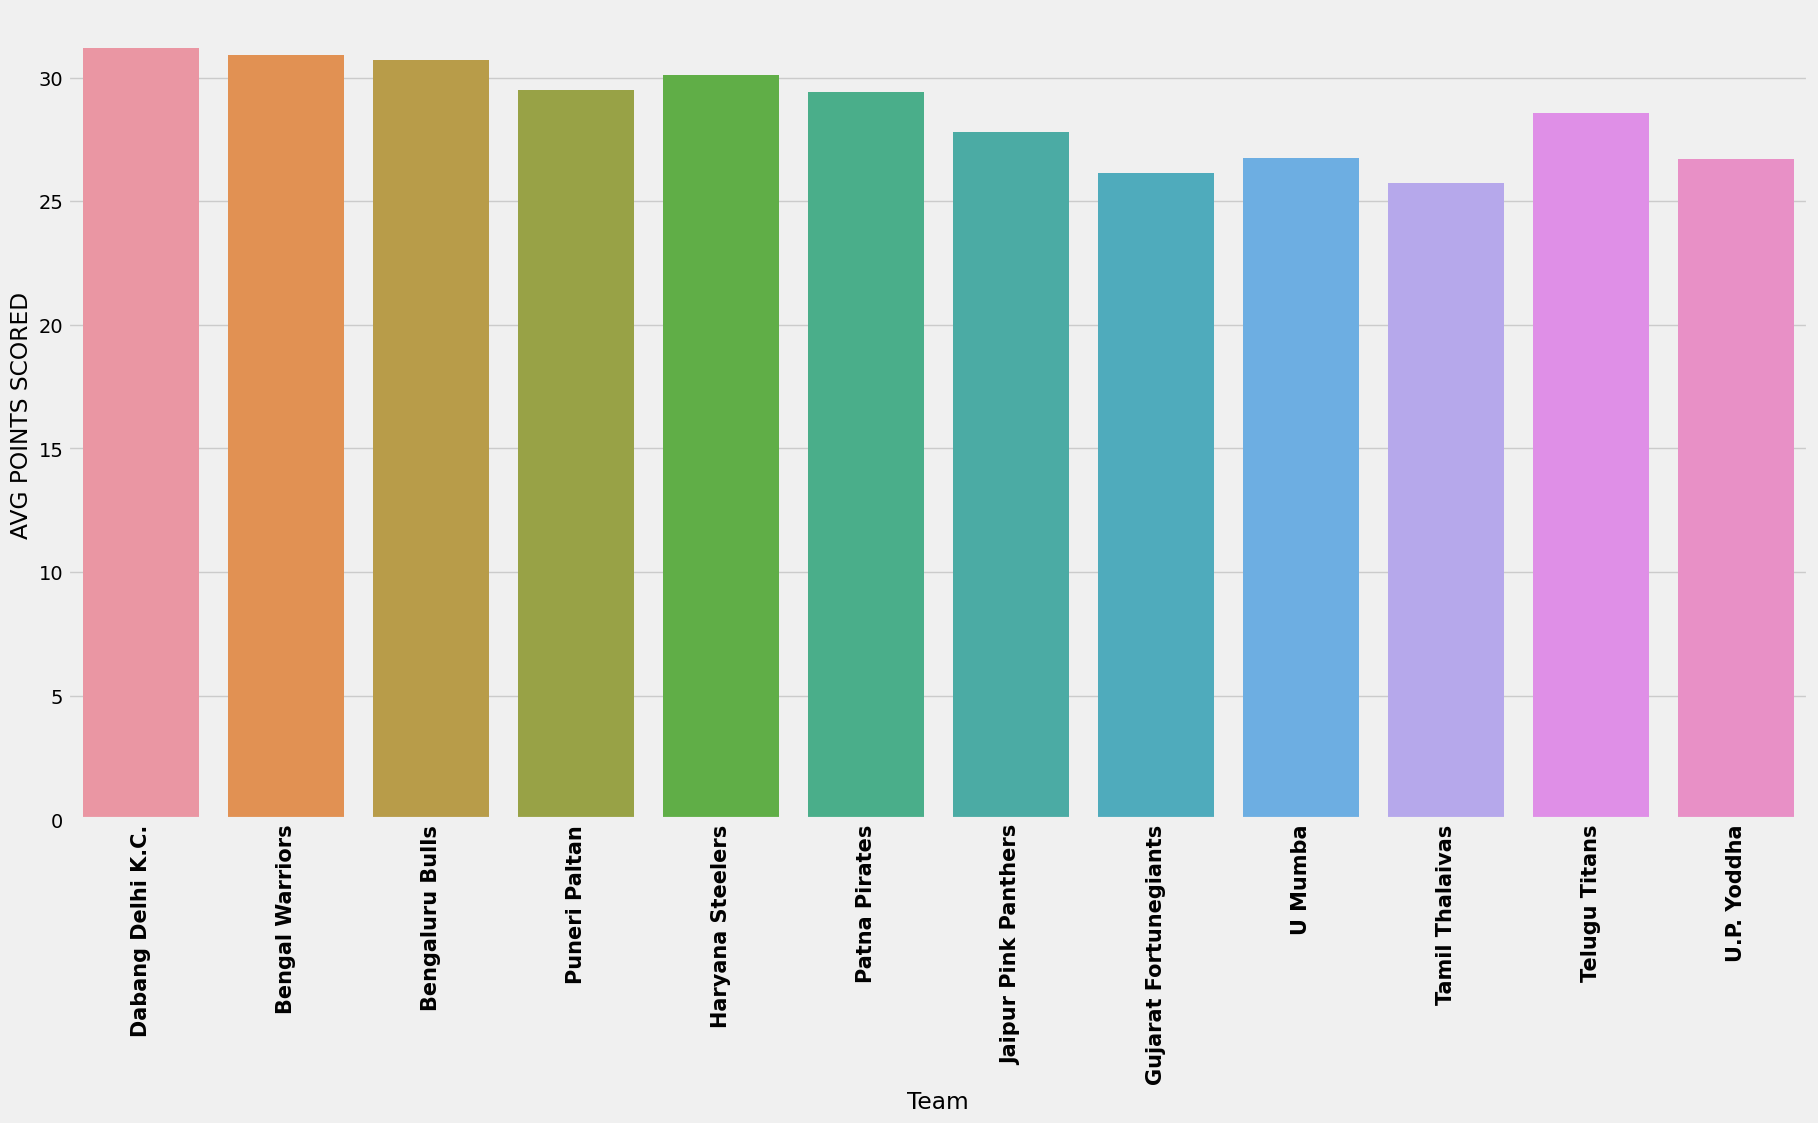

In [29]:
plt.figure(figsize=(20,10))
plt.xticks(fontsize=15,fontweight=1000, rotation = 90)
sns.barplot(x = 'Team', y = 'AVG POINTS SCORED', data = teamdata)

From the above observation, we can clearly see that maximum average points scored by the team is Dabang Delhi K.C.

In [30]:
players_data.columns

Index(['Name', 'Position', 'Team', 'Match Played', 'Points',
       'Career Best Points', 'Not Out Percentage', 'Raids',
       'Successful Raid Percentage', 'Raid Touch Points', 'Raid Bonus Points',
       'Total Raid Points', 'Super Raids', 'Super 10s', 'Tackles',
       'Successful Tackles Per Match', 'Tackle Success Rate', 'Super Tackles',
       'High 5s'],
      dtype='object')

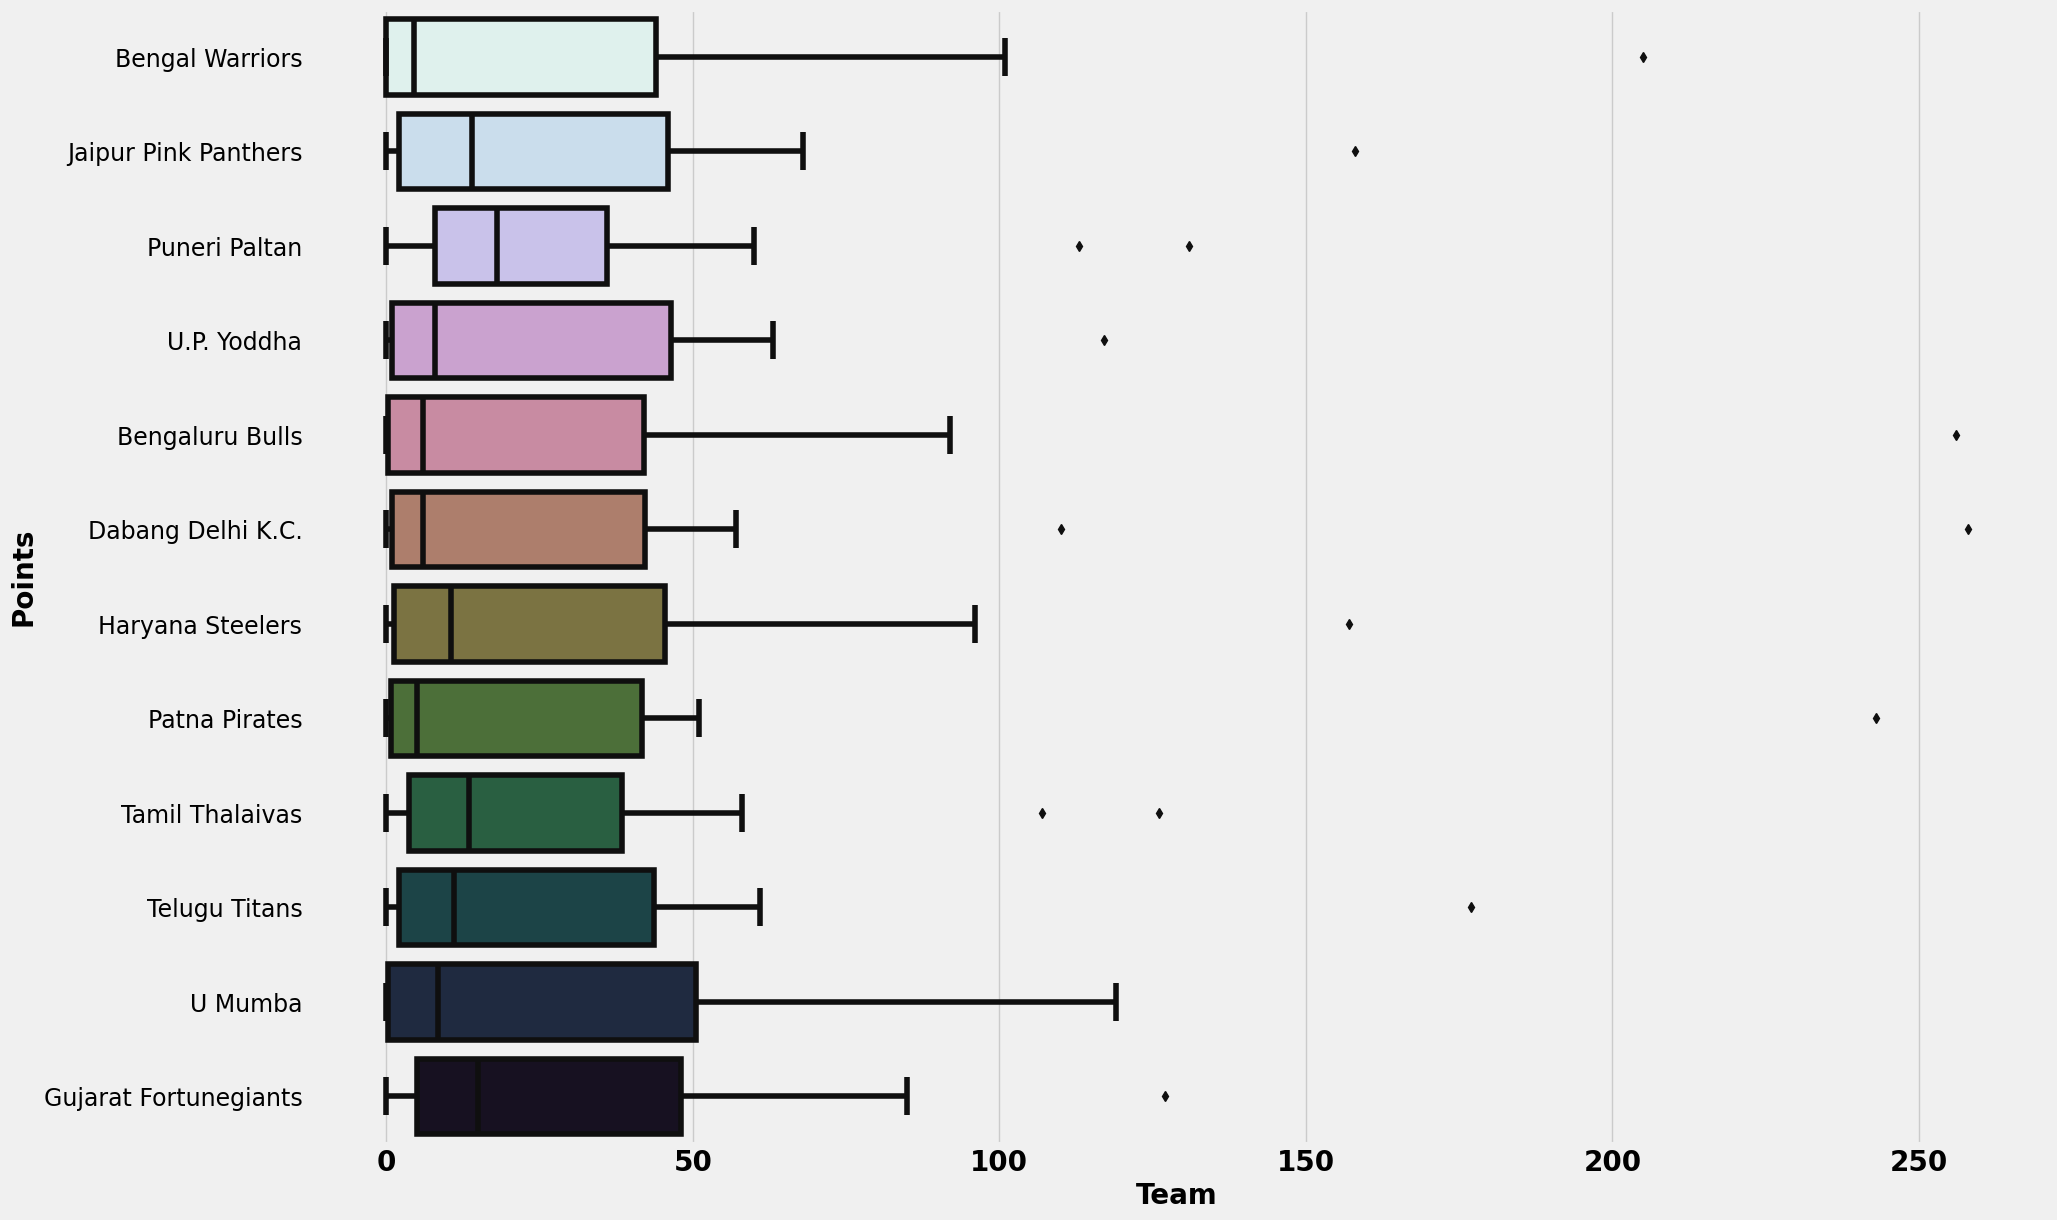

In [31]:
plt.figure(figsize=(20,14))
sns.boxplot(y='Team',x='Points',data=players_data, palette='cubehelix_r',order=players_data.Team.value_counts().iloc[:15].index)
plt.xlabel('Team',fontdict={'fontsize':20})
plt.ylabel('Points',fontdict={'fontsize':20})
plt.xticks(fontsize=20,fontweight=1000)
plt.yticks(fontsize=17)
plt.xlabel('Team',fontsize=20,fontweight='bold')
plt.ylabel('Points',fontsize=20,fontweight='bold')
plt.show()

### Top players of the season(Raiders, Defenders, Allrounders) 

##### Raiders

<AxesSubplot: xlabel='Name', ylabel='Points'>

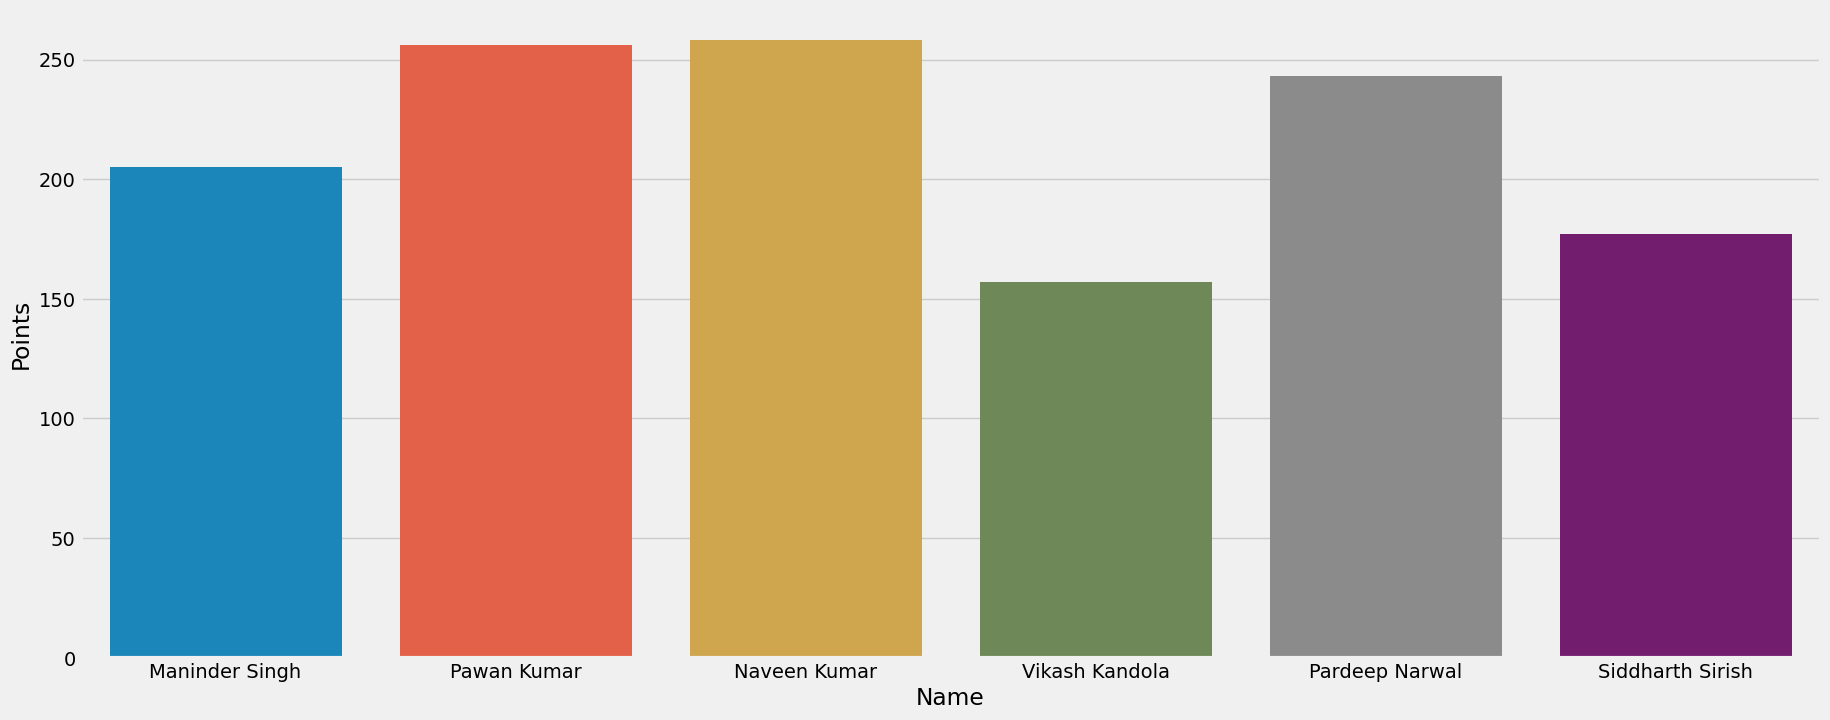

In [32]:
raiders = players_data[players_data.Position =='Raider']
raiders_data = raiders[raiders.Points > 150]
plt.figure(figsize=(20,8))
sns.barplot(x=raiders_data.Name,y=raiders_data.Points,data=raiders_data)

From the above observation, top most raider of the season is Naveen Kumar

##### Allrounders

In [33]:
def f(d):
    if (d == 'All Rounder'):
        return 'AR'
    else:
        return d
players_data['Players_Category'] = players_data.Position.map(f)

<AxesSubplot: xlabel='Name', ylabel='Points'>

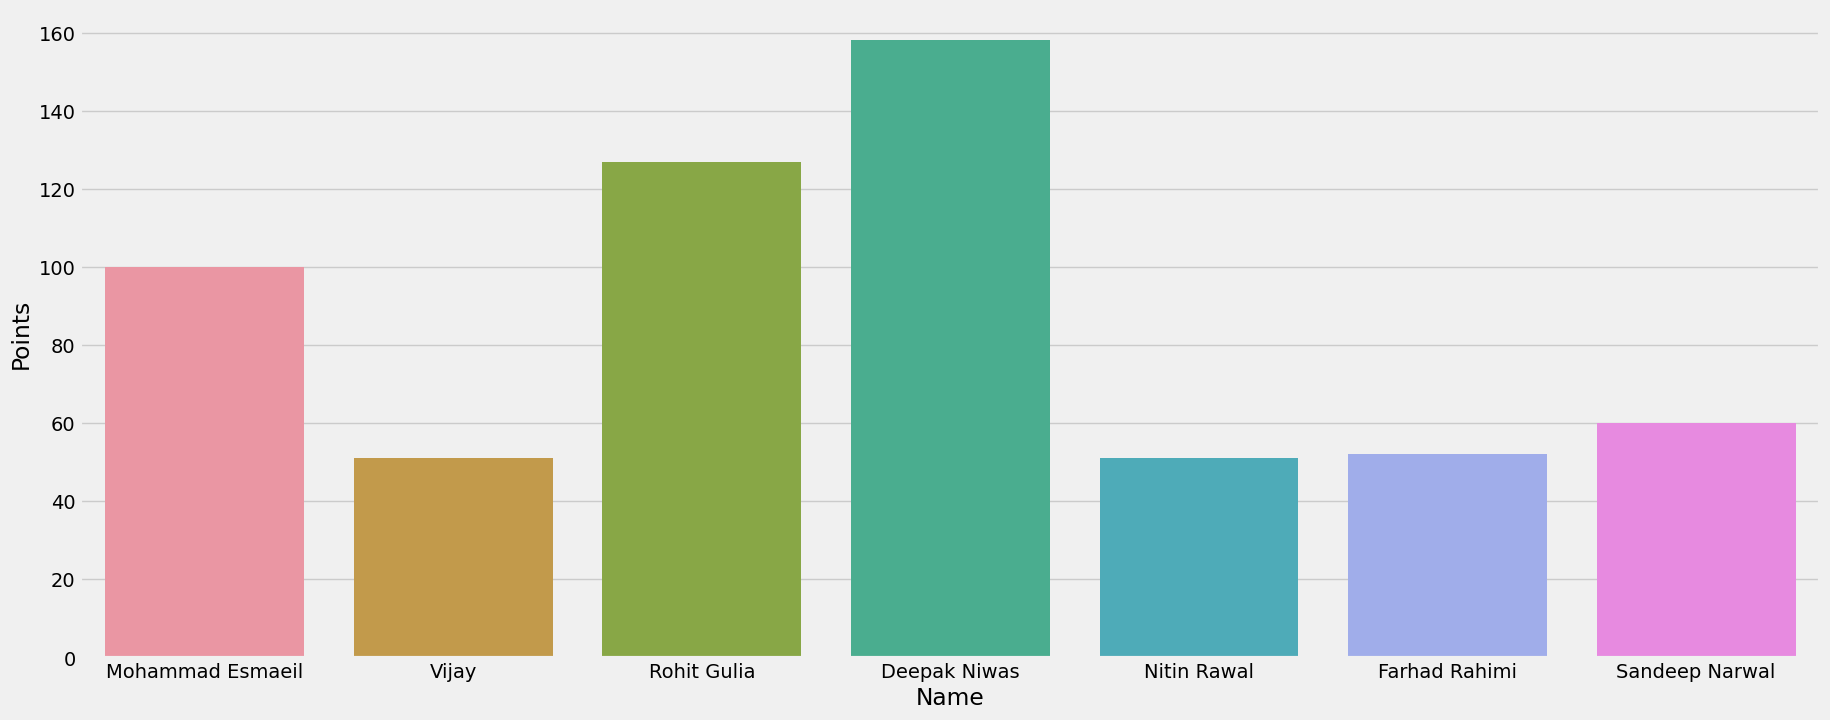

In [34]:
AR = players_data[players_data.Players_Category =='AR']
AR_data = AR[AR.Points > 50]
plt.figure(figsize=(20,8))
sns.barplot(x=AR_data.Name,y=AR_data.Points,data=AR_data)

From the above observation, we can see that Deepak Niwas is the best allrounder of the season.

##### Defenders

In [35]:
players_data.Position.unique()

array(['Raider', 'Defender, right cover', 'Defender, right corner',
       'Defender, right and left cover', 'Defender, left cover',
       'Defender, left corner', 'Defender', 'All Rounder',
       'Defender, right and left corner'], dtype=object)

In [36]:
def f(d):
    if (d == 'Defender, right cover') | (d == 'Defender, right corner')  | (d == 'Defender, right and left cover') | (d == 'Defender, left corner') | (d == 'Defender, right and left corner') | (d =='Defender') |(d == 'Defender, right corner')  | (d == 'Defender, right and left cover') | (d == 'Defender, left cover') :
        return 'DR'
    else:
        return d
players_data['Players_Category'] = players_data.Position.map(f)

<AxesSubplot: xlabel='Name', ylabel='Points'>

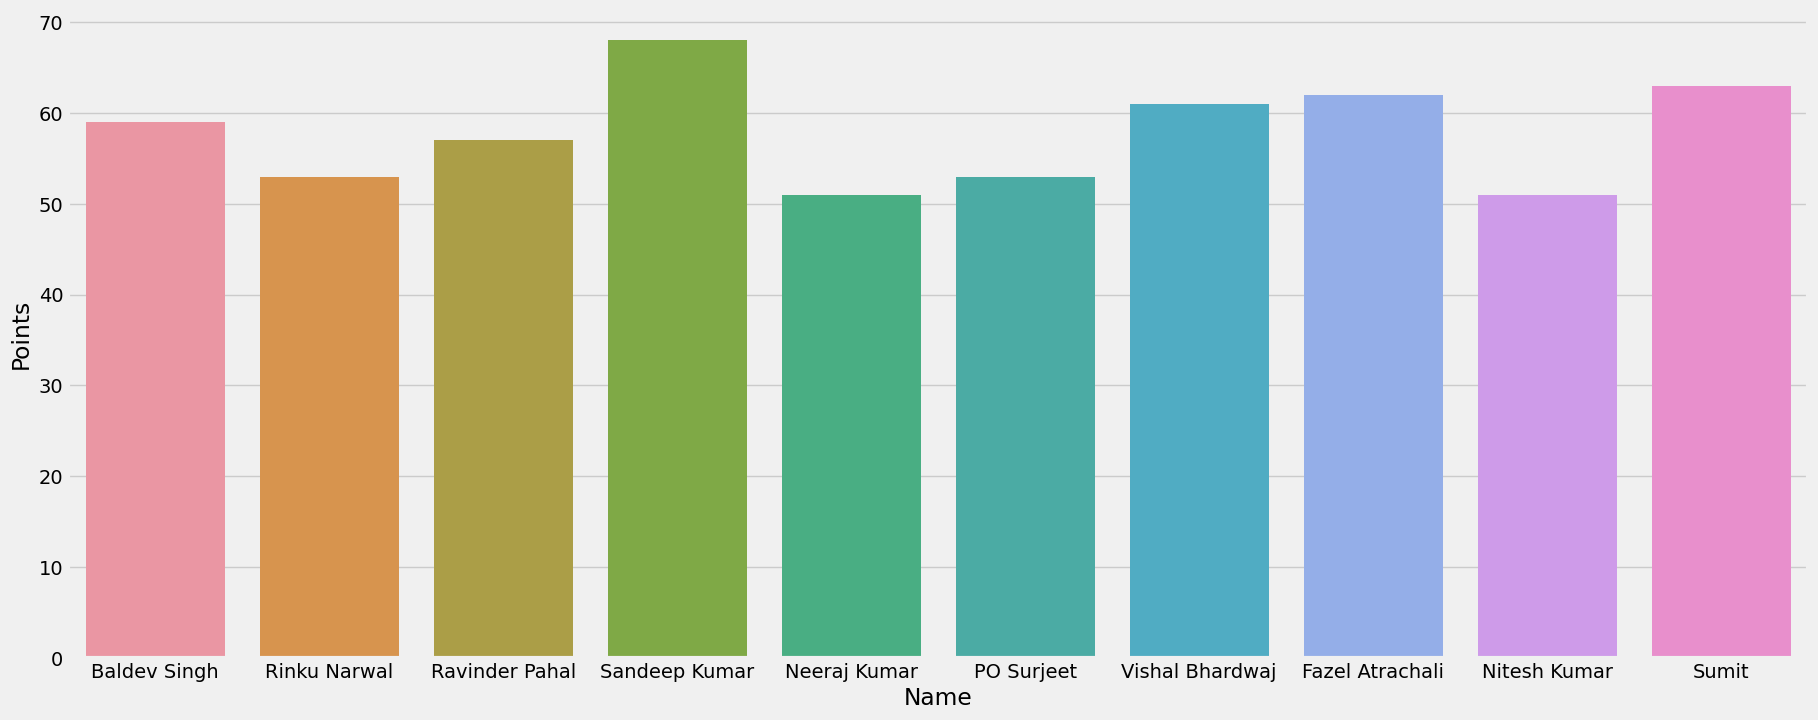

In [37]:
DR = players_data[players_data.Players_Category =='DR']
DR_data = DR[DR.Points > 50]
plt.figure(figsize=(20,8))
sns.barplot(x=DR_data.Name,y=DR_data.Points,data=DR_data)

From the above graph, Sandeep Kumar is the best defender of the season.

### Average score by Raiders, Allrounders, Defenders

<AxesSubplot: xlabel='Players_Category', ylabel='Points'>

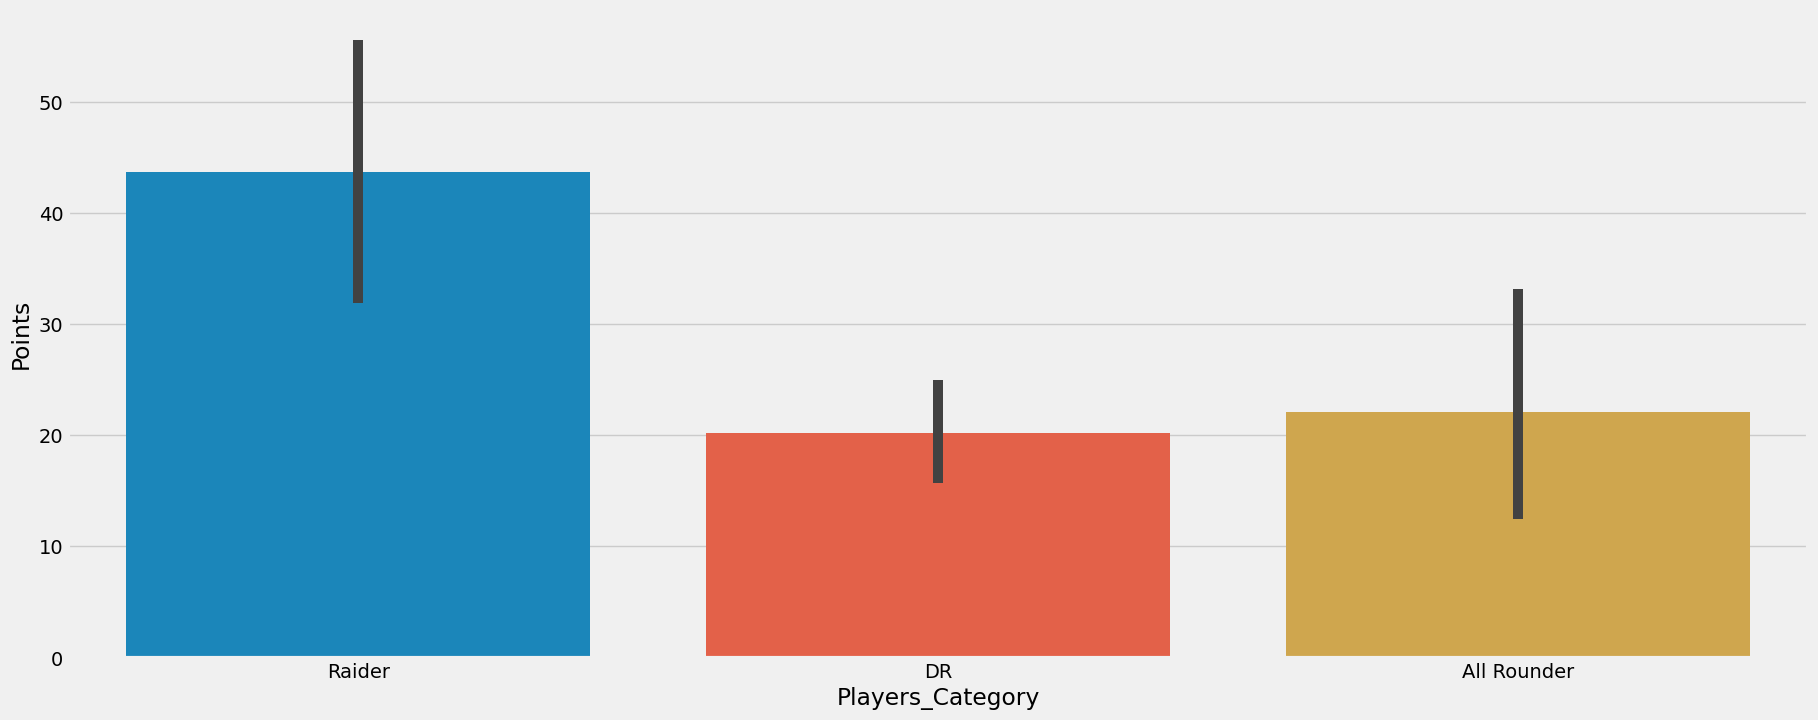

In [38]:
plt.figure(figsize=(20,8))
sns.barplot(x=players_data.Players_Category,y=players_data.Points,data=players_data)

Most points was scored by the Raiders in 2019 pro kabaddi season.

### Relationship between Raids and Successful Raid Percentage for all the teams

<AxesSubplot: xlabel='Successful Raid Percentage', ylabel='Raids'>

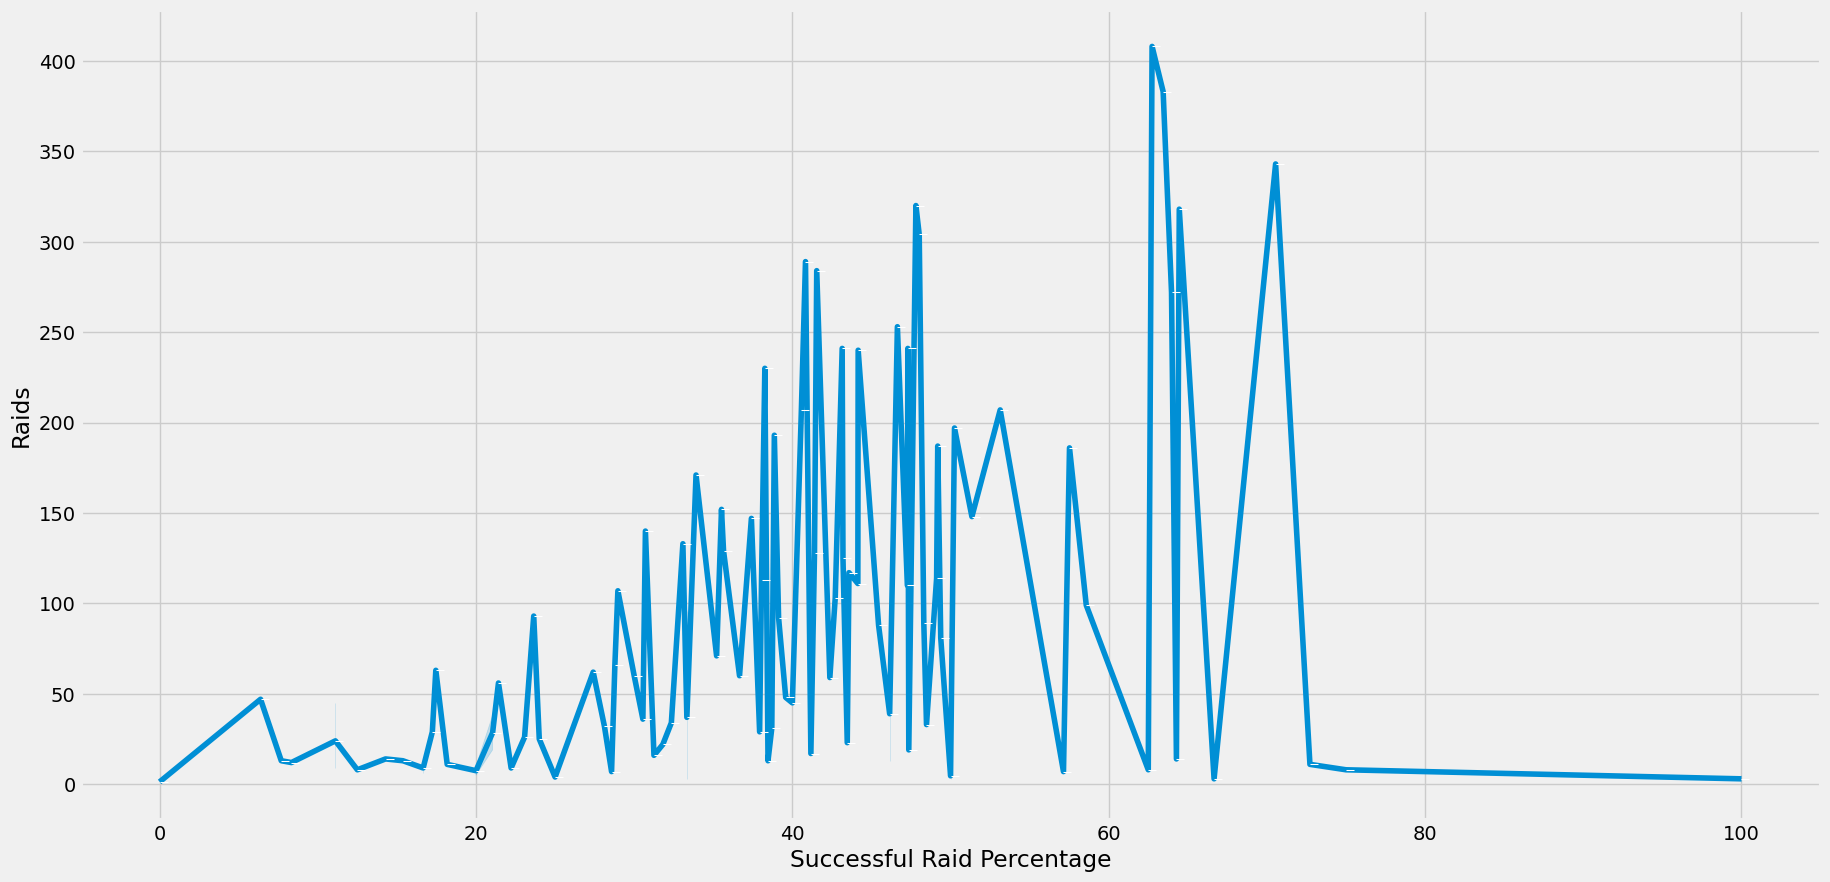

In [39]:
plt.figure(figsize=(20,10))
sns.lineplot(x=players_data['Successful Raid Percentage'], y=players_data.Raids,data=players_data,marker=True)

### Dividing dataset into different Teams

In [40]:
players_data.Team.unique()

array(['Bengal Warriors', 'Bengaluru Bulls', 'Dabang Delhi K.C.',
       'Gujarat Fortunegiants', 'Haryana Steelers',
       'Jaipur Pink Panthers', 'Patna Pirates', 'Puneri Paltan',
       'Tamil Thalaivas', 'Telugu Titans', 'U Mumba', 'U.P. Yoddha'],
      dtype=object)

In [41]:
Bengal_warriors = players_data[players_data.Team =='Bengal Warriors']

In [42]:
Bengaluru_bulls = players_data[players_data.Team == 'Bengaluru Bulls']

In [43]:
Dabang_delhi = players_data[players_data.Team == 'Dabang Delhi K.C.']

In [44]:
Gujarat_fortunegiants = players_data[players_data.Team == 'Gujarat Fortunegiants']

In [45]:
Haryana_steelers = players_data[players_data.Team == 'Haryana Steelers']

In [46]:
Jaypur_pink_panthers = players_data[players_data.Team == 'Jaipur Pink Panthers']

In [47]:
Patna_pirates = players_data[players_data.Team =='Patna Pirates' ]

In [48]:
Puneri_paltan = players_data[players_data.Team == 'Puneri Paltan']

In [49]:
Tamil_thalaivas = players_data[players_data.Team == 'Tamil Thalaivas']

In [50]:
Telugu_titans = players_data[players_data.Team == 'Telugu Titans']

In [51]:
U_mumba = players_data[players_data.Team == 'U Mumba']

In [52]:
UP_yoddha = players_data[players_data.Team == 'U.P. Yoddha']

#### Lets assume Bengaluru Bulls is our team  

In [53]:
my_team = Bengaluru_bulls 

In [54]:
my_team.head()

,Name,Position,Team,Match Played,Points,Career Best Points,Not Out Percentage,Raids,Successful Raid Percentage,Raid Touch Points,Raid Bonus Points,Total Raid Points,Super Raids,Super 10s,Tackles,Successful Tackles Per Match,Tackle Success Rate,Super Tackles,High 5s,Players_Category
20,Rohit Kumar,Raider,Bengaluru Bulls,17.0,92.0,14.0,70.86,230.0,38.26,70.0,18.0,88.0,2.0,3.0,17.0,0.23,23.52,0.0,0.0,Raider
21,Banty,Raider,Bengaluru Bulls,11.0,21.0,6.0,71.11,45.0,40.00,15.0,3.0,18.0,0.0,0.0,8.0,0.27,37.50,0.0,0.0,Raider
22,Lal Mohar,Raider,Bengaluru Bulls,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,Raider
23,Pawan Kumar,Raider,Bengaluru Bulls,19.0,256.0,29.0,74.05,343.0,70.55,190.0,52.0,242.0,6.0,13.0,29.0,0.68,48.27,1.0,0.0,Raider
24,Sumit Singh,Raider,Bengaluru Bulls,15.0,39.0,7.0,69.56,92.0,39.13,14.0,22.0,36.0,0.0,0.0,11.0,0.13,27.27,1.0,0.0,Raider


### Points scored by top players of my_team

<AxesSubplot: xlabel='Points', ylabel='Name'>

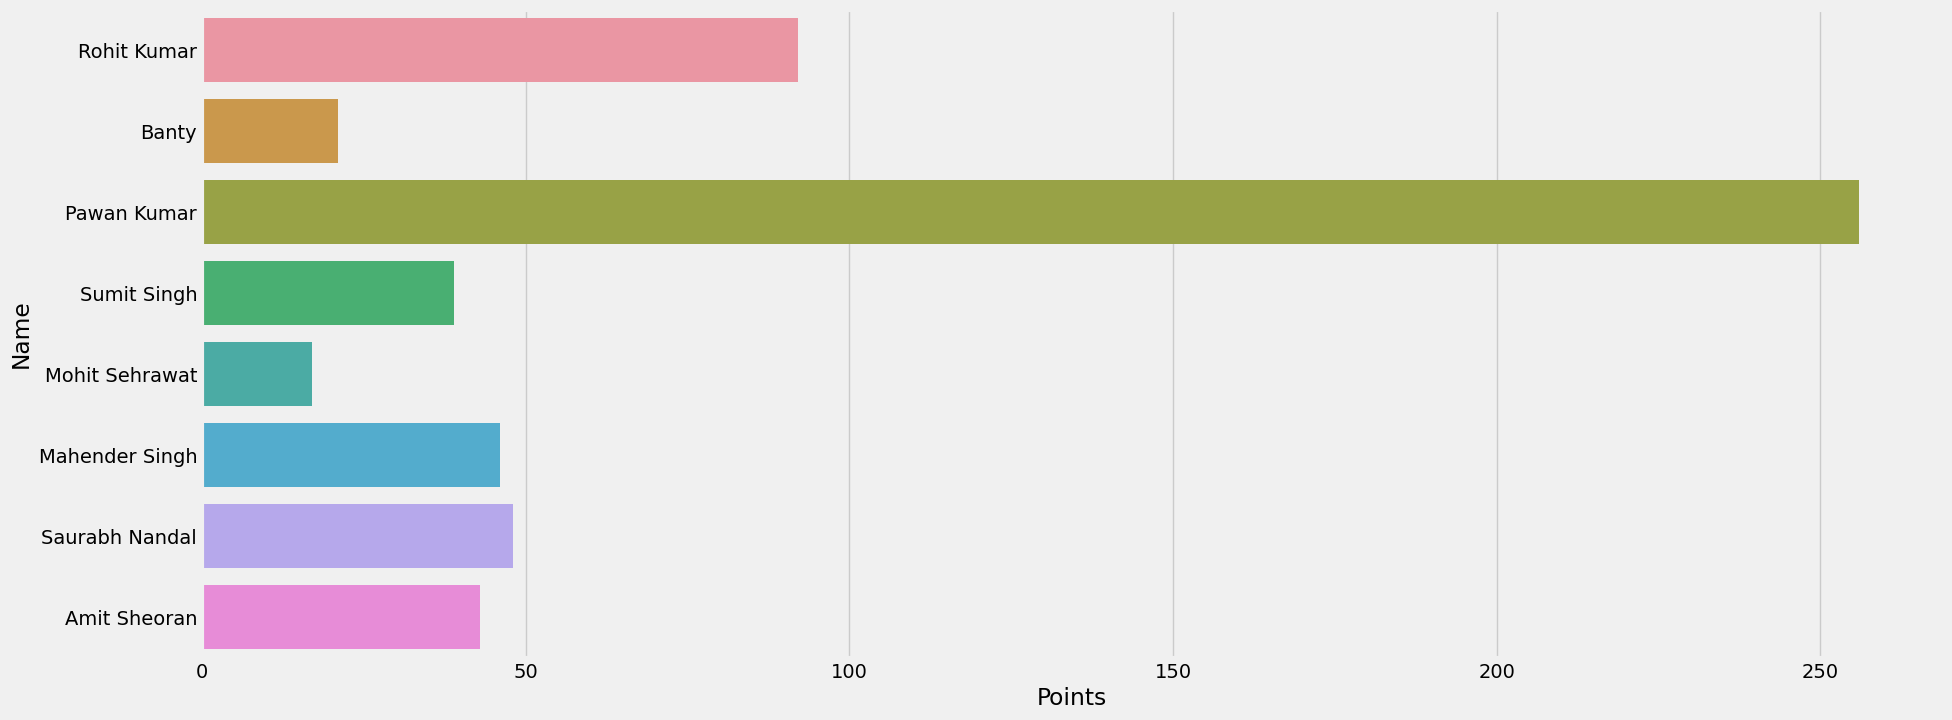

In [55]:
players = my_team[my_team.Points > 10]
plt.figure(figsize=(20,8))
plt.xticks=180
sns.barplot(y='Name',x='Points',data=players)

### Points scored by different position players of my_team

<AxesSubplot: xlabel='Position', ylabel='Points'>

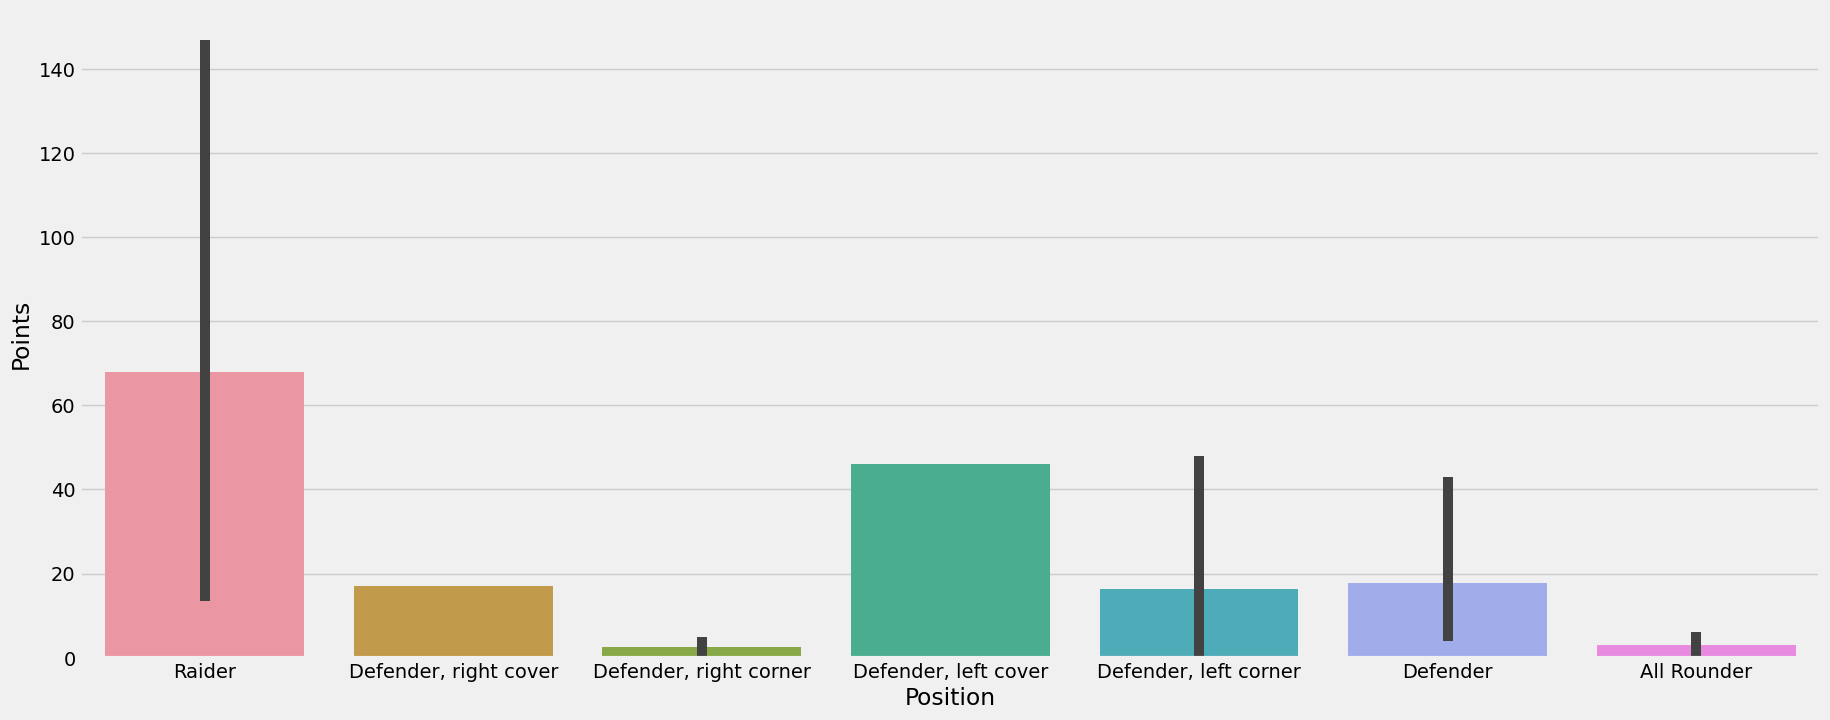

In [56]:
plt.figure(figsize=(20,8))
sns.barplot(x=my_team.Position , y= my_team.Points,data=my_team)

### Relationship between Raids and Successful Raid Percentage of my_team

<AxesSubplot: xlabel='Successful Raid Percentage', ylabel='Raids'>

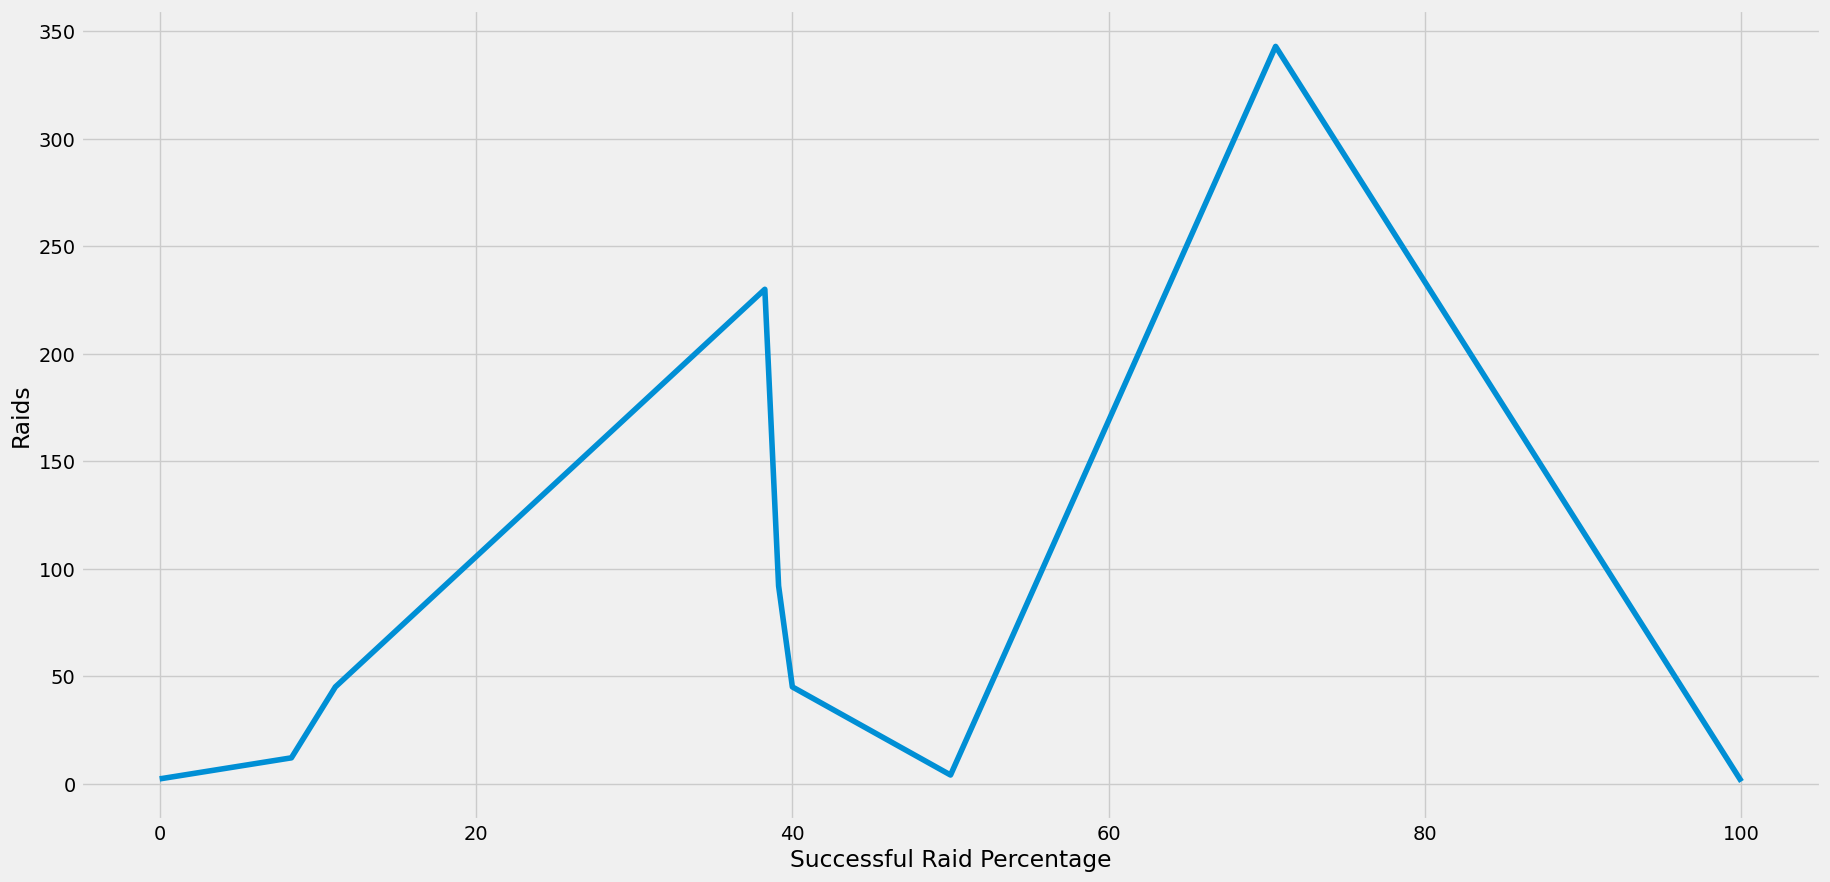

In [57]:
plt.figure(figsize=(20,10))
sns.lineplot(x=my_team['Successful Raid Percentage'],y=my_team.Raids,data=my_team)

### Super tackles of my_team

<AxesSubplot: xlabel='Super Tackles', ylabel='Name'>

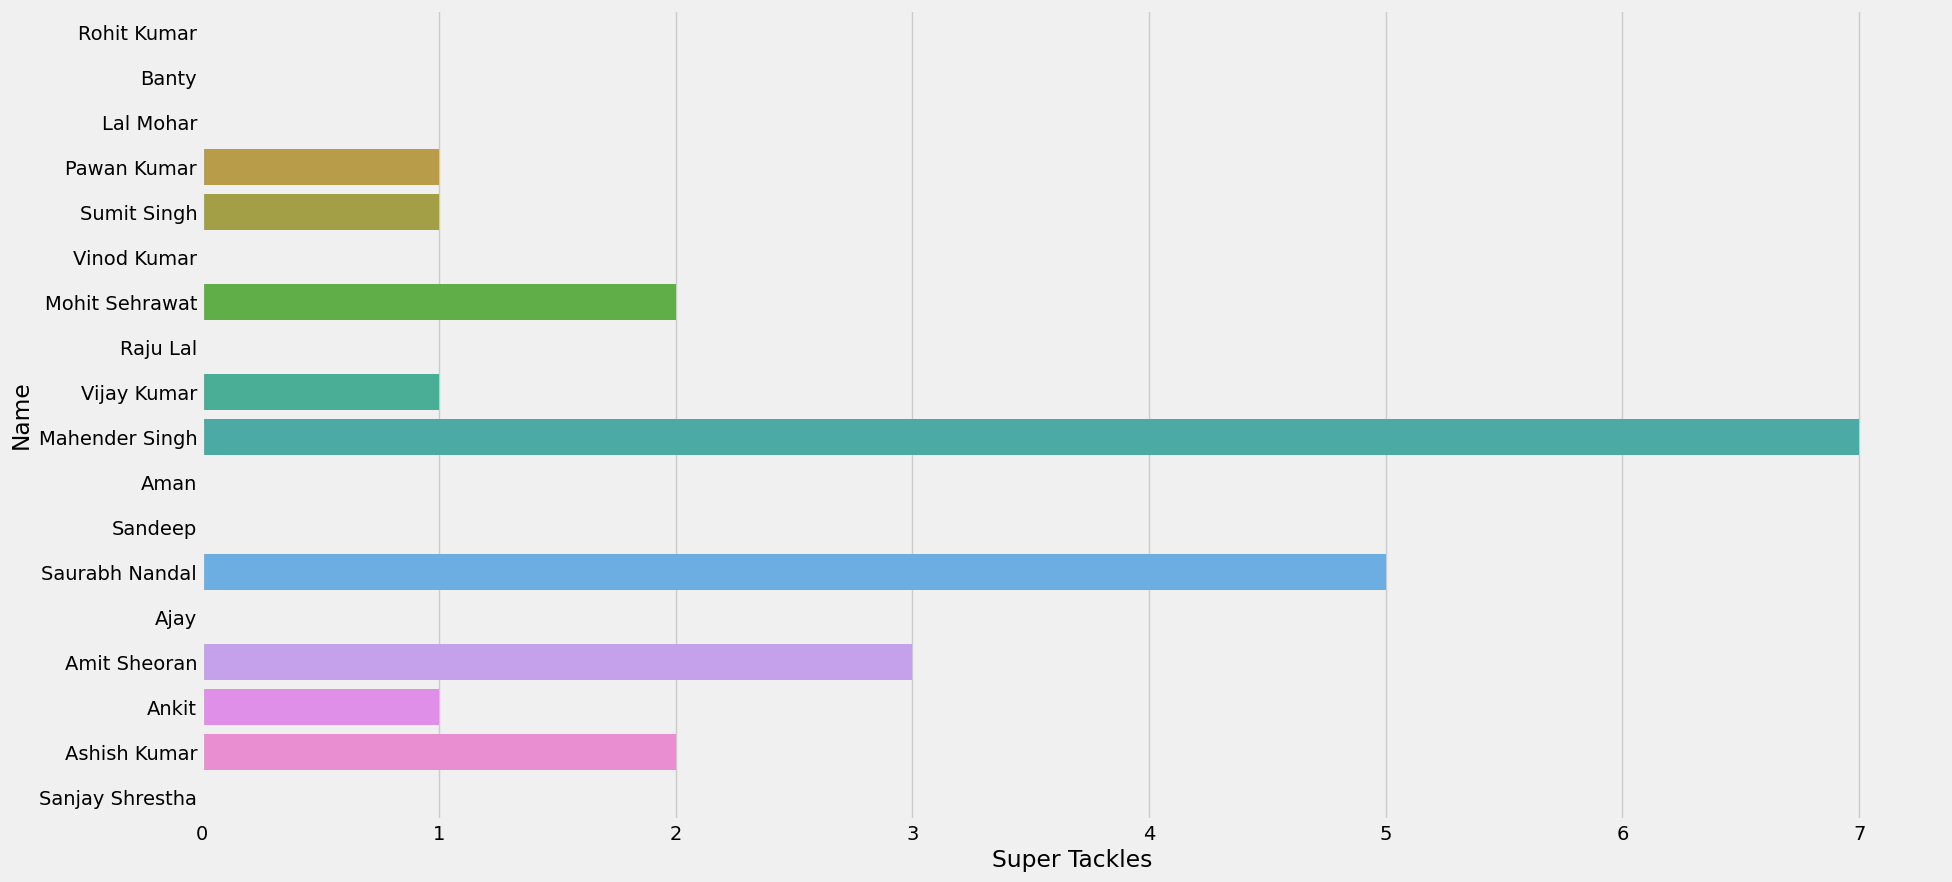

In [58]:
plt.figure(figsize=(20,10))
sns.barplot(y='Name', x= 'Super Tackles',data= my_team)

### Super 10s of my_team

<AxesSubplot: xlabel='Super 10s', ylabel='Name'>

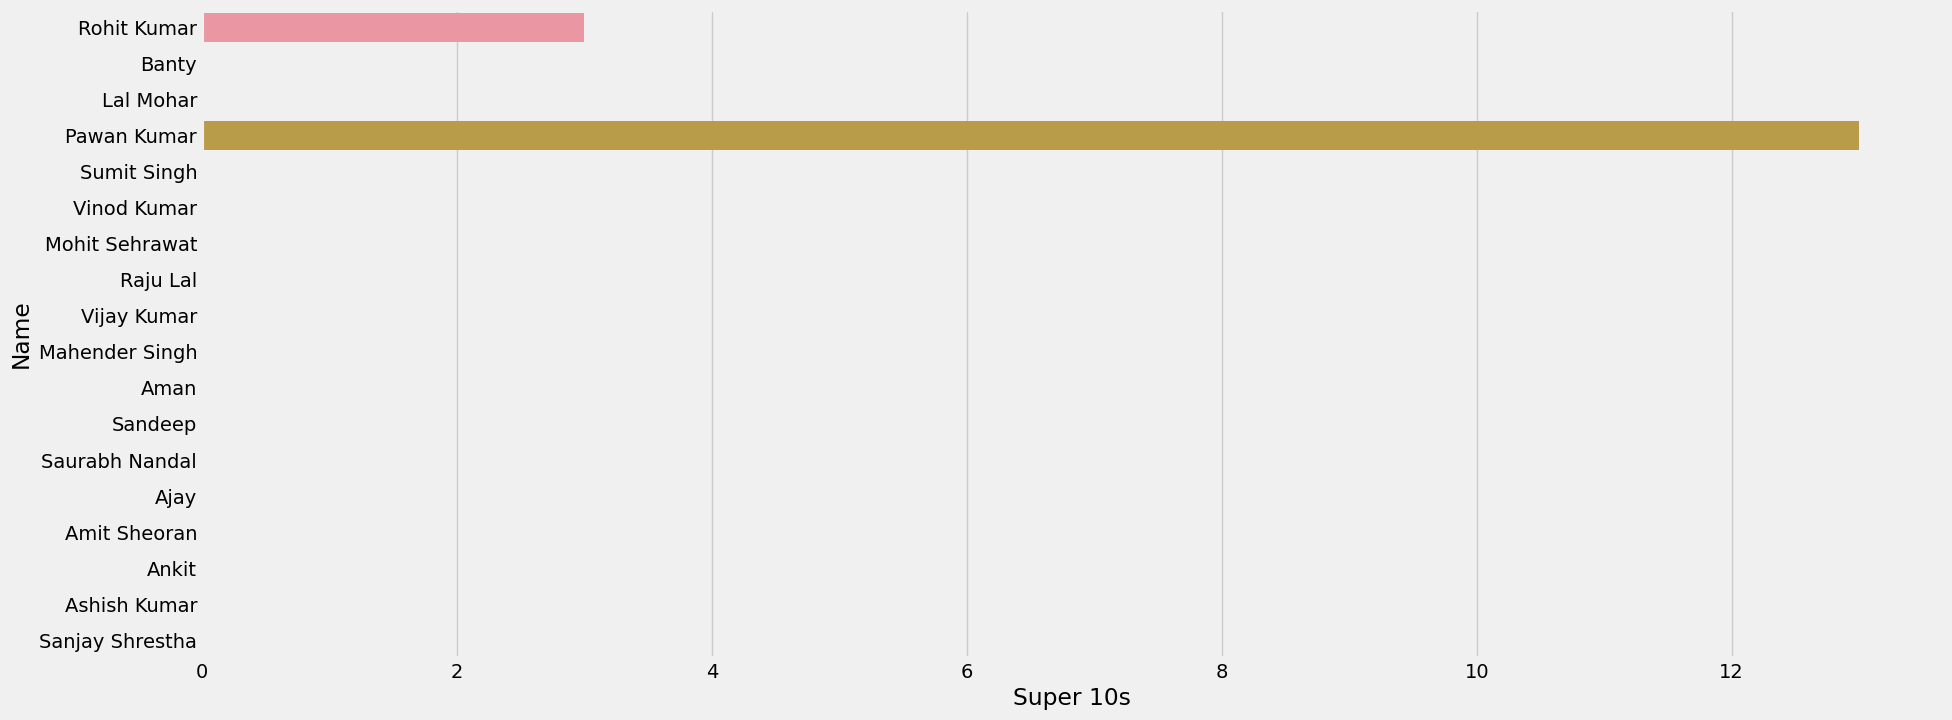

In [59]:
plt.figure(figsize=(20,8))
sns.barplot(y='Name', x= 'Super 10s',data=my_team)

<AxesSubplot: xlabel='Super Raids', ylabel='Name'>

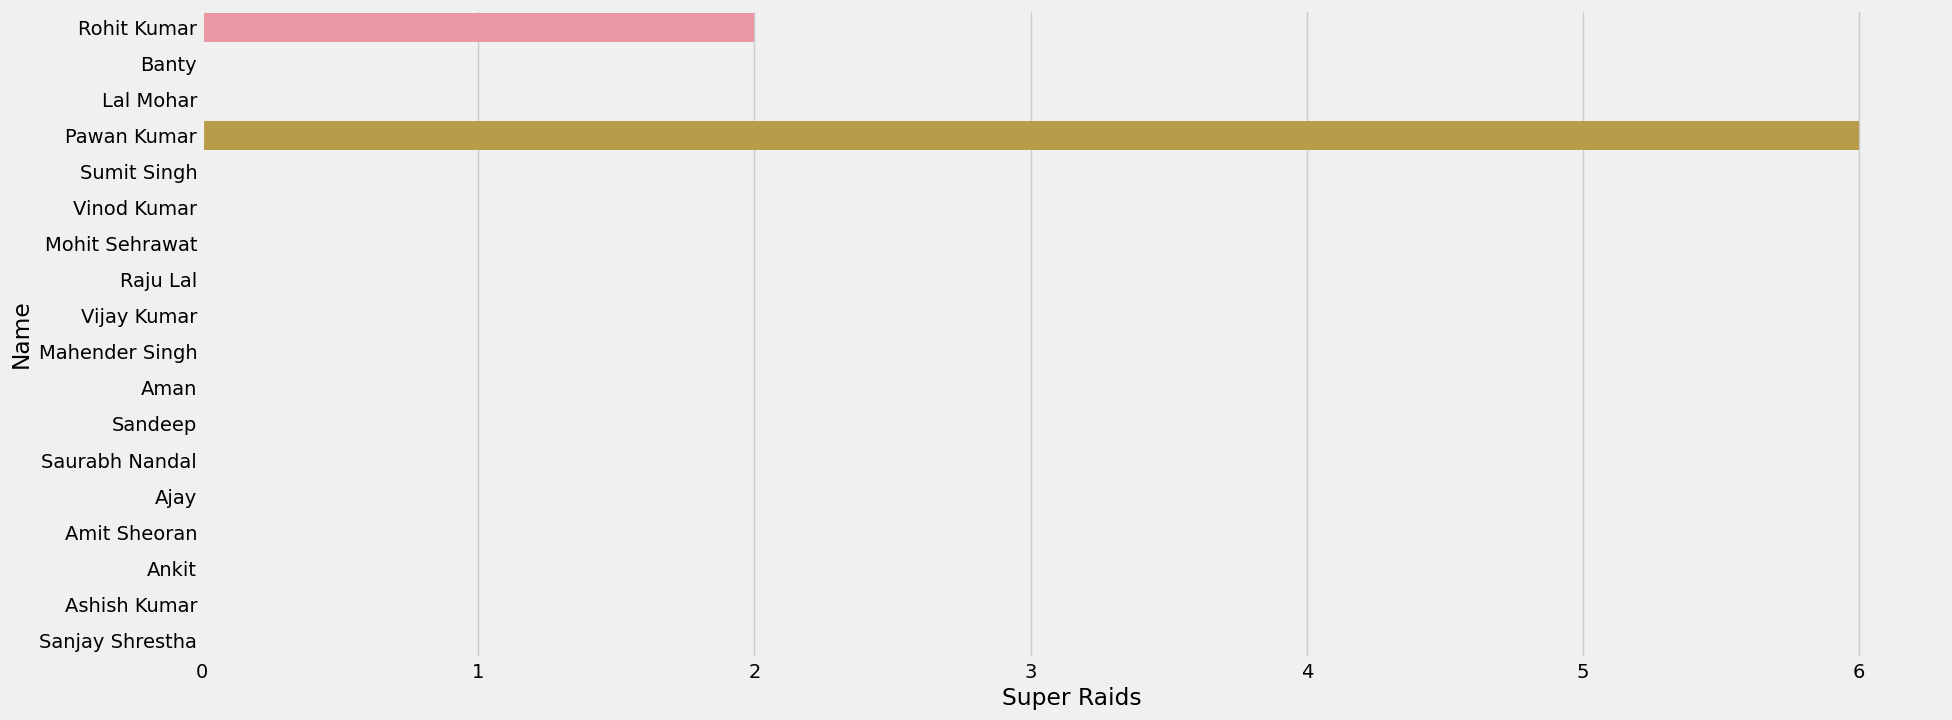

In [60]:
plt.figure(figsize=(20,8))
sns.barplot(y='Name', x= 'Super Raids',data=my_team)

<AxesSubplot: xlabel='Team'>

<Figure size 2000x5000 with 0 Axes>

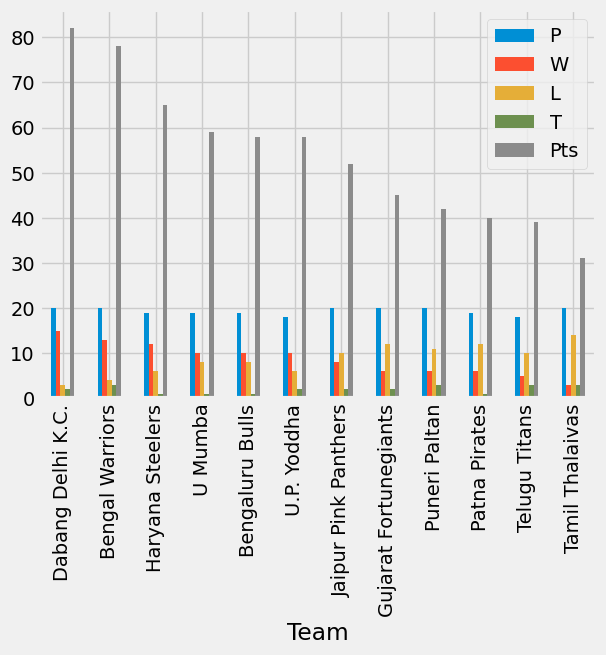

In [61]:
plt.figure(figsize=(20,50))
leaguetable.plot(x="Team", y=["P", "W","L","T","Pts"], kind="bar")

The top team in the points table after the completion of league matches is Dabang Delhi K.C

In [62]:
leaguetable.columns

Index(['Rank', 'Team', 'P', 'W', 'L', 'T', 'Score Diff.', 'Pts'], dtype='object')

<AxesSubplot: xlabel='Team'>

<Figure size 2000x5000 with 0 Axes>

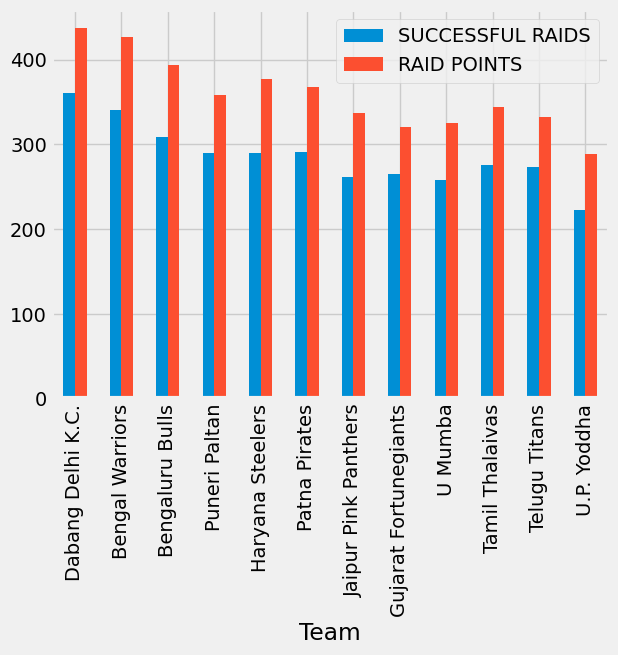

In [63]:
plt.figure(figsize=(20,50))
teamdata.plot(x="Team", y=["SUCCESSFUL RAIDS", "RAID POINTS",], kind="bar")

The team with the highest points for successful raids is Dabang Delhi K.C

In [64]:
teamdata.columns

Index(['Team', 'Games', 'TOTAL POINTS SCORED', 'TOTAL POINTS CONCEDED',
       'AVG POINTS SCORED', 'SUCCESSFUL RAIDS', 'RAID POINTS',
       'AVG RAID POINTS', 'SUCCESSFUL TACKLES', 'TACKLE POINTS',
       'AVG TACKLE POINTS', 'SUPER RAID', 'SUPER TACKLES',
       'DO-OR-DIE RAID POINTS', 'ALL-OUTS INFLICTED', 'ALL-OUTS CONCEDED'],
      dtype='object')

<Figure size 2000x5000 with 0 Axes>

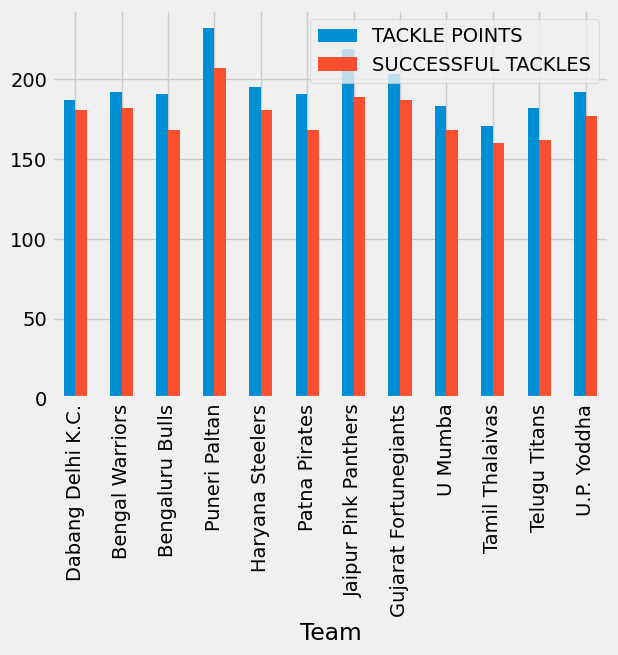

In [65]:
plt.figure(figsize=(20,50))
teamdata.plot(x="Team", y=["TACKLE POINTS", "SUCCESSFUL TACKLES",], kind="bar")
plt.show()

The team with the highest points for successful tackles is Puneri Paltan.

<AxesSubplot: xlabel='Team'>

<Figure size 2000x5000 with 0 Axes>

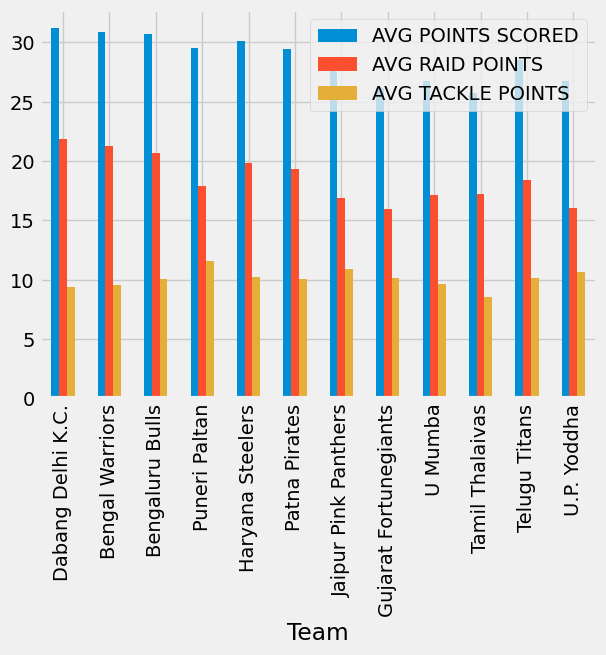

In [66]:
plt.figure(figsize=(20,50))
teamdata.plot(x="Team", y=["AVG POINTS SCORED","AVG RAID POINTS","AVG TACKLE POINTS"], kind="bar")

The team with the highest super-performance total is Dabang Delhi K.C

In [67]:
best_rider = players_data.sort_values(by='Successful Raid Percentage').iloc[180:].sort_values(by="Raids").iloc[30:]

In [68]:
best_rider

,Name,Position,Team,Match Played,Points,Career Best Points,Not Out Percentage,Raids,Successful Raid Percentage,Raid Touch Points,Raid Bonus Points,Total Raid Points,Super Raids,Super 10s,Tackles,Successful Tackles Per Match,Tackle Success Rate,Super Tackles,High 5s,Players_Category
1,K. Prapanjan,Raider,Bengal Warriors,18.0,101.0,12.0,79.18,197.0,50.25,74.0,25.0,99.0,4.0,3.0,14.0,0.11,14.28,0.0,0.0,Raider
134,Pankaj Mohite,Raider,Puneri Paltan,16.0,113.0,17.0,77.77,207.0,53.14,93.0,17.0,110.0,4.0,3.0,15.0,0.18,20.00,0.0,0.0,Raider
208,Shrikant Jadhav,Raider,U.P. Yoddha,18.0,117.0,15.0,77.17,241.0,47.30,94.0,20.0,114.0,2.0,3.0,8.0,0.16,37.50,0.0,0.0,Raider
173,Siddharth Sirish,Raider,Telugu Titans,18.0,177.0,23.0,72.79,272.0,63.97,132.0,42.0,174.0,6.0,7.0,6.0,0.16,50.00,0.0,0.0,Raider
91,Deepak Niwas,All Rounder,Jaipur Pink Panthers,20.0,158.0,14.0,80.92,304.0,48.02,120.0,26.0,146.0,2.0,7.0,27.0,0.50,44.44,2.0,0.0,All Rounder
0,Maninder Singh,Raider,Bengal Warriors,20.0,205.0,19.0,82.07,318.0,64.46,175.0,30.0,205.0,6.0,10.0,7.0,0.00,0.00,0.0,0.0,Raider
80,Vikash Kandola,Raider,Haryana Steelers,16.0,157.0,13.0,80.62,320.0,47.81,134.0,19.0,153.0,6.0,9.0,15.0,0.25,26.66,0.0,0.0,Raider
23,Pawan Kumar,Raider,Bengaluru Bulls,19.0,256.0,29.0,74.05,343.0,70.55,190.0,52.0,242.0,6.0,13.0,29.0,0.68,48.27,1.0,0.0,Raider
110,Pardeep Narwal,Raider,Patna Pirates,19.0,243.0,26.0,75.19,383.0,63.44,215.0,28.0,243.0,12.0,13.0,2.0,0.00,0.00,0.0,0.0,Raider
41,Naveen Kumar,Raider,Dabang Delhi K.C.,20.0,258.0,19.0,85.29,408.0,62.74,199.0,57.0,256.0,2.0,19.0,6.0,0.10,33.33,0.0,0.0,Raider


<AxesSubplot: xlabel='Name'>

<Figure size 2000x5000 with 0 Axes>

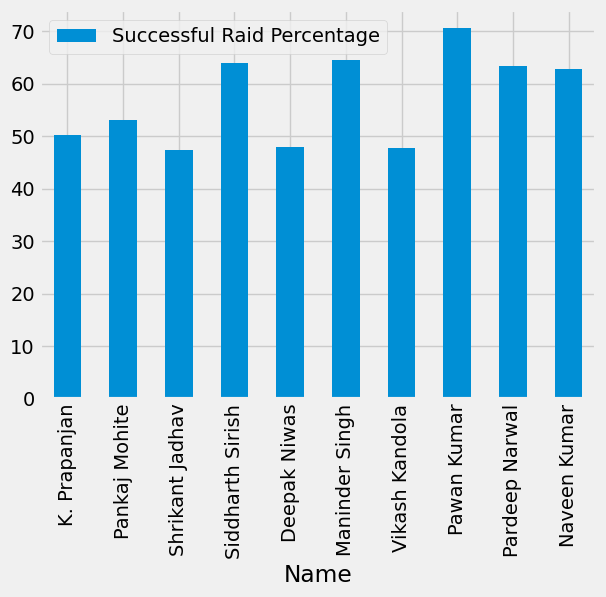

In [69]:
plt.figure(figsize=(20,50))
best_rider.plot(x="Name", y=["Successful Raid Percentage"], kind="bar")

From the above observation, the player with the highest succesful Raid percentage for minimum 150 raids is Pawan Kumar. 

In [70]:
players_data.columns

Index(['Name', 'Position', 'Team', 'Match Played', 'Points',
       'Career Best Points', 'Not Out Percentage', 'Raids',
       'Successful Raid Percentage', 'Raid Touch Points', 'Raid Bonus Points',
       'Total Raid Points', 'Super Raids', 'Super 10s', 'Tackles',
       'Successful Tackles Per Match', 'Tackle Success Rate', 'Super Tackles',
       'High 5s', 'Players_Category'],
      dtype='object')

In [71]:
best_defender = players_data.sort_values(by='Tackle Success Rate').iloc[180:].sort_values(by='Match Played').iloc[17:].sort_values(by='Tackles').iloc[3:]

In [72]:
best_defender

,Name,Position,Team,Match Played,Points,Career Best Points,Not Out Percentage,Raids,Successful Raid Percentage,Raid Touch Points,Raid Bonus Points,Total Raid Points,Super Raids,Super 10s,Tackles,Successful Tackles Per Match,Tackle Success Rate,Super Tackles,High 5s,Players_Category
106,Nitin Rawal,All Rounder,Jaipur Pink Panthers,15.0,51.0,8.0,75.00,96.0,33.33,19.0,13.0,32.0,1.0,0.0,32.0,1.00,59.37,4.0,1.0,All Rounder
61,More GB,Raider,Gujarat Fortunegiants,17.0,64.0,9.0,75.71,140.0,30.71,30.0,13.0,43.0,0.0,0.0,34.0,1.17,61.76,1.0,0.0,Raider
115,Monu,Raider,Patna Pirates,19.0,36.0,5.0,79.36,63.0,17.46,9.0,2.0,11.0,0.0,0.0,42.0,0.94,59.52,7.0,0.0,Raider
139,Jadhav Balasaheb,"Defender, right cover",Puneri Paltan,18.0,35.0,6.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,64.0,1.55,54.68,7.0,3.0,DR
200,Sandeep Narwal,All Rounder,U Mumba,19.0,60.0,6.0,83.33,60.0,30.00,13.0,5.0,18.0,0.0,0.0,75.0,1.94,56.00,5.0,1.0,All Rounder
82,Ravi Kumar,"Defender, right cover",Haryana Steelers,17.0,40.0,6.0,100.00,11.0,0.00,0.0,0.0,0.0,0.0,0.0,82.0,2.05,48.78,5.0,3.0,DR
34,Amit Sheoran,Defender,Bengaluru Bulls,19.0,43.0,6.0,0.00,1.0,0.00,0.0,0.0,0.0,0.0,0.0,83.0,2.10,51.80,3.0,3.0,DR
73,Dharmaraj Cheralathan,"Defender, right and left corner",Haryana Steelers,17.0,44.0,5.0,88.88,18.0,16.66,1.0,2.0,3.0,0.0,0.0,84.0,2.17,48.80,4.0,1.0,DR
201,Nitesh Kumar,"Defender, right corner",U.P. Yoddha,18.0,51.0,7.0,0.00,2.0,50.00,0.0,1.0,1.0,0.0,0.0,85.0,2.44,58.82,6.0,3.0,DR
69,Sunil Kumar,Defender,Gujarat Fortunegiants,18.0,47.0,7.0,100.00,13.0,7.69,1.0,0.0,1.0,0.0,0.0,86.0,2.22,53.48,6.0,4.0,DR


<AxesSubplot: xlabel='Name'>

<Figure size 2000x5000 with 0 Axes>

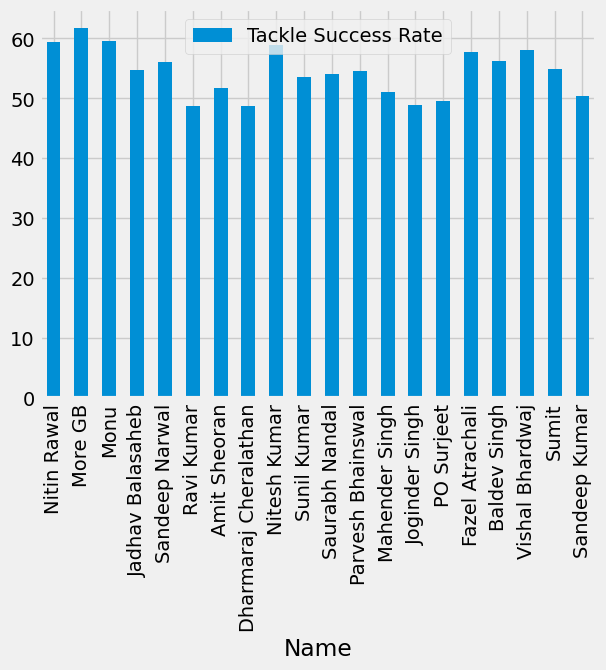

In [73]:
plt.figure(figsize=(20,50))
best_defender.plot(x="Name", y=["Tackle Success Rate"], kind="bar")

The player with the highest successful tackle percentage for minimum of 15 matches played and attended minimum of 30 tackles is More GB.

## Thank you!!